In [1]:
# 📌 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 📌 2. Load raw dataset
df = pd.read_csv("../data/raw/flood_data_2022.csv")

In [3]:
# 📌 3. View first few rows
df.head()

,Date,Rainfall_mm,River_Level_m,Temperature_C,Humidity_%,Flood_Occurred
0,2022-01-01,1.3,0.97,17.9,59,0
1,2022-01-02,16.5,1.10,17.0,62,0
2,2022-01-03,0.1,1.15,18.2,58,0
3,2022-01-04,17.5,1.17,19.6,59,0
4,2022-01-05,0.2,1.35,17.0,57,0


In [4]:
# 📌 4. Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            365 non-null    object 
 1   Rainfall_mm     365 non-null    float64
 2   River_Level_m   365 non-null    float64
 3   Temperature_C   365 non-null    float64
 4   Humidity_%      365 non-null    int64  
 5   Flood_Occurred  365 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 17.2+ KB


In [5]:
# 📌 5. Check missing values
df.isnull().sum()

Date              0
Rainfall_mm       0
River_Level_m     0
Temperature_C     0
Humidity_%        0
Flood_Occurred    0
dtype: int64

In [6]:
# 📌 6. Summary statistics
df.describe()

,Rainfall_mm,River_Level_m,Temperature_C,Humidity_%,Flood_Occurred
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.348219,1.325534,25.016164,62.747945,0.054795
std,36.759322,0.362903,5.900697,7.478322,0.227891
min,0.000000,0.610000,14.900000,49.000000,0.000000
25%,1.600000,1.080000,19.600000,59.000000,0.000000
50%,3.900000,1.210000,25.000000,61.000000,0.000000
75%,8.600000,1.540000,30.300000,65.000000,0.000000
max,201.300000,2.530000,37.100000,99.000000,1.000000


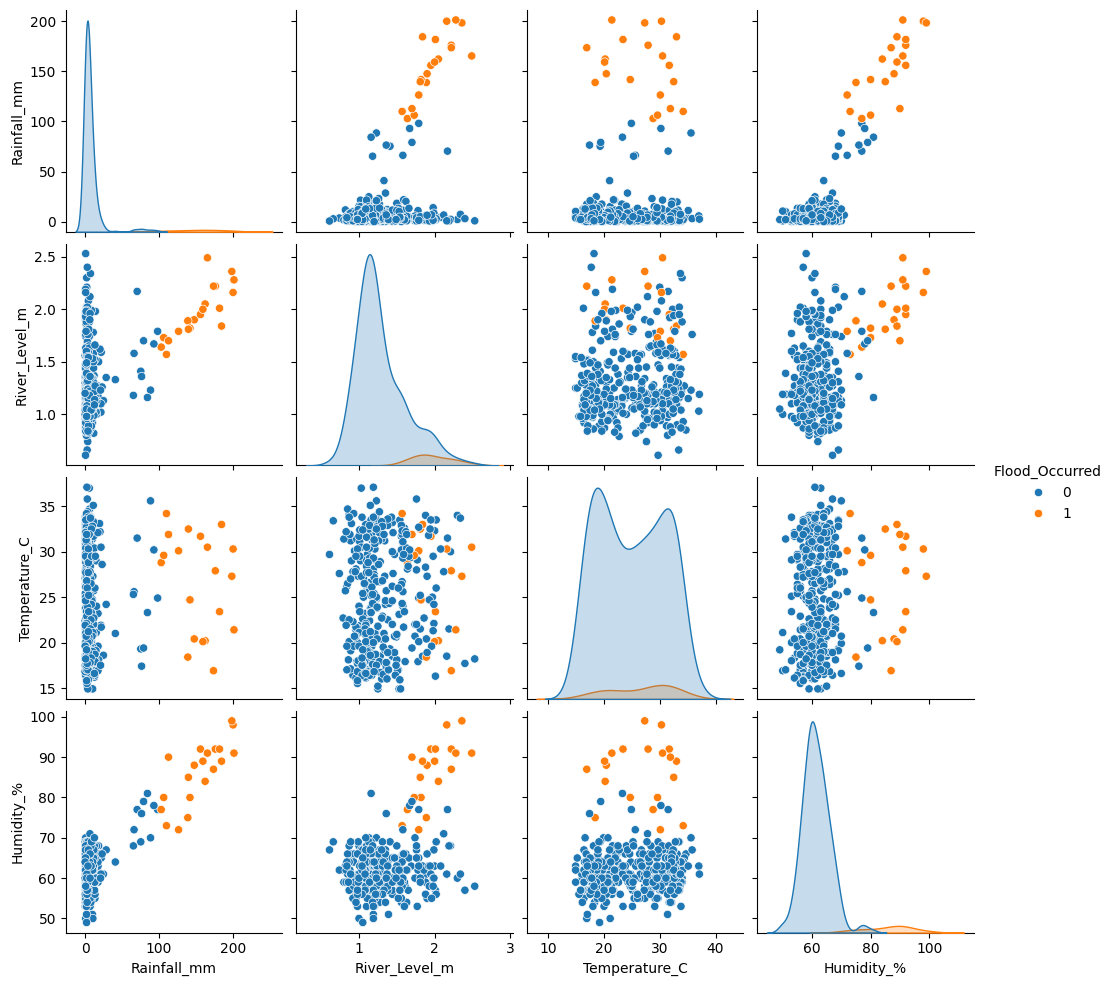

In [7]:
# 📌 7. Visualize features
sns.pairplot(df, hue="Flood_Occurred")
plt.show()

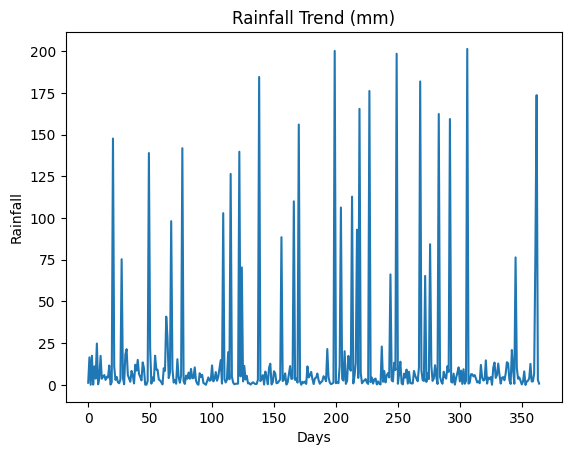

In [8]:
# Rainfall trend
plt.plot(df["Rainfall_mm"])
plt.title("Rainfall Trend (mm)")
plt.xlabel("Days")
plt.ylabel("Rainfall")
plt.show()


<Axes: >

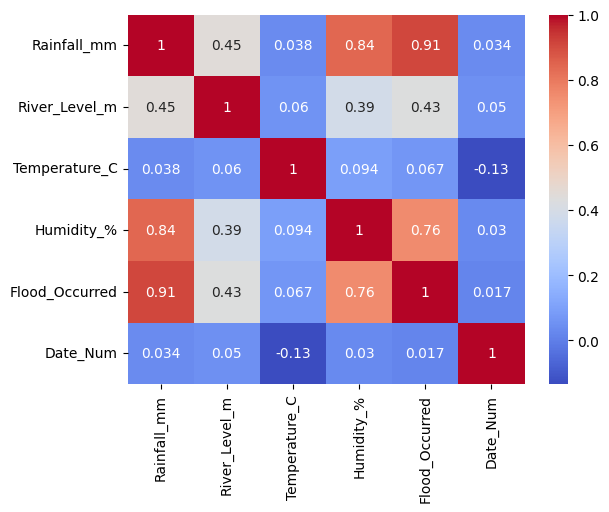

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_Num'] = df['Date'].map(pd.Timestamp.toordinal)

numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
